In [ ]:
!pip install pandas


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DataBase

In [ ]:
import pandas as pd
import os
import kagglehub

# Cargar df1 desde URL
url = "https://yusef.es/dataset/causeofdeath.csv"
df1 = pd.read_csv(url, sep=';', on_bad_lines='skip')
df1.columns = df1.columns.str.strip().str.lower().str.replace(" ", "_")

# Descargar dataset desde Kaggle
path = kagglehub.dataset_download("ivanchvez/causes-of-death-our-world-in-data")

# Cargar df2 desde Kaggle path
df2_path = os.path.join(path, "20222703 Causes Of Death Clean Output V2.0.csv")
df2 = pd.read_csv(df2_path)
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ", "_")

# Vista previa rápida
print("df1:")
print(df1.head())
print("\ndf2:")
print(df2.head())




df1:
  location       age   sex cause_of_death_or_injury  \
0   Global  All ages  Both             Tuberculosis   
1   Global  All ages  Both             Tuberculosis   
2   Global  All ages  Both                 HIV/AIDS   
3   Global  All ages  Both                 HIV/AIDS   
4   Global  All ages  Both       Diarrheal diseases   

                            measure         value  
0      Percent of total deaths 2017   0,021157376  
1  Deaths annual % change 2010-2017  -0,032548776  
2      Percent of total deaths 2017   0,017061125  
3  Deaths annual % change 2010-2017  -0,045662897  
4      Percent of total deaths 2017   0,028053310  

df2:
                      causes_name  \
0                      Meningitis   
1                       Neoplasms   
2  Fire, heat, and hot substances   
3                         Malaria   
4                        Drowning   

                             causes_full_description  death_numbers  \
0  Deaths - Meningitis - Sex: Both - Age: All Age...

In [ ]:
# Revisión general
print(df1.info())
print("\nNulos por columna:")
print(df1.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   location                  338 non-null    object
 1   age                       338 non-null    object
 2   sex                       338 non-null    object
 3   cause_of_death_or_injury  338 non-null    object
 4   measure                   338 non-null    object
 5   value                     338 non-null    object
dtypes: object(6)
memory usage: 16.0+ KB
None

Nulos por columna:
location                    0
age                         0
sex                         0
cause_of_death_or_injury    0
measure                     0
value                       0
dtype: int64


In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1 = df1.dropna(subset=['location', 'cause_of_death_or_injury', 'value'])


In [ ]:
print(df1.columns.tolist())


['location', 'age', 'sex', 'cause_of_death_or_injury', 'measure', 'value']


In [ ]:
for col in df1.columns:
    print(f"{col} → {df1[col].unique()[:10]}")


location → ['Global']
age → ['All ages']
sex → ['Both']
cause_of_death_or_injury → ['Tuberculosis' 'HIV/AIDS' 'Diarrheal diseases'
 'Other intestinal infectious diseases' 'Lower respiratory infections'
 'Upper respiratory infections' 'Otitis media' 'Meningitis' 'Encephalitis'
 'Diphtheria']
measure → ['Percent of total deaths 2017' 'Deaths annual % change 2010-2017']
value → ['0,021157376' '-0,032548776' '0,017061125' '-0,045662897' '0,028053310'
 '-0,019358474' '2,587234796e-05' '-0,066309070' '0,045733648'
 '-0,021149644']


Limpieza del d2

In [ ]:
print(df2.info())
print("\nNulos por columna:")
print(df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201762 entries, 0 to 201761
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   causes_name              201762 non-null  object 
 1   causes_full_description  201762 non-null  object 
 2   death_numbers            190575 non-null  float64
 3   entity                   201762 non-null  object 
 4   code                     200277 non-null  object 
 5   year                     201762 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 9.2+ MB
None

Nulos por columna:
causes_name                    0
causes_full_description        0
death_numbers              11187
entity                         0
code                        1485
year                           0
dtype: int64


In [ ]:
df2 = df2.drop_duplicates()


In [ ]:
df2 = df2.dropna(subset=['entity', 'year', 'causes_name', 'death_numbers'])


In [ ]:
df2['year'] = pd.to_numeric(df2['year'], errors='coerce')
df2['death_numbers'] = pd.to_numeric(df2['death_numbers'], errors='coerce')


In [ ]:
print("Dimensiones después de limpiar:", df2.shape)
df2.head()


Dimensiones después de limpiar: (190575, 6)


,causes_name,causes_full_description,death_numbers,entity,code,year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007


# Merge de ambos DF

In [ ]:
# df1 viene del CSV desde URL
url = "https://yusef.es/dataset/causeofdeath.csv"
df1 = pd.read_csv(url, sep=';', on_bad_lines='skip')

# df2 viene del archivo de Kaggle ya descargado
import os
import kagglehub
path = kagglehub.dataset_download("ivanchvez/causes-of-death-our-world-in-data")
df2 = pd.read_csv(os.path.join(path, '20222703 Causes Of Death Clean Output V2.0.csv'))


In [ ]:
#merge por causa de muerte
# Merge cruzando por el nombre de la causa
merged_df = pd.merge(df2, df1, left_on='causes_name_df2', right_on='causes_name_df1', how='left')


In [ ]:
print("Columnas del nuevo DataFrame combinado:")
print(merged_df.columns)

# Ver ejemplos
merged_df[['entity', 'year', 'causes_name_df2', 'death_numbers', 'value']].head()

# Exportar
merged_df.to_csv("causas_de_muerte_cruzadas.csv", index=False)


Columnas del nuevo DataFrame combinado:
Index(['causes_name_df2', 'causes_full_description', 'death_numbers', 'entity',
       'code', 'year', 'location', 'age', 'sex', 'causes_name_df1', 'measure',
       'value'],
      dtype='object')


In [ ]:
#ver resultado
print("Columnas del DataFrame combinado:")
print(merged_df.columns.tolist())
print("\nPrimeras filas del merged:")
merged_df.head()


Columnas del DataFrame combinado:
['causes_name_df2', 'causes_full_description', 'death_numbers', 'entity', 'code', 'year', 'location', 'age', 'sex', 'causes_name_df1', 'measure', 'value']

Primeras filas del merged:


,causes_name_df2,causes_full_description,death_numbers,entity,code,year,location,age,sex,causes_name_df1,measure,value
0,meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007,Global,All ages,Both,meningitis,Percent of total deaths 2017,"0,005148122"
1,meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007,Global,All ages,Both,meningitis,Deaths annual % change 2010-2017,"-0,037392192"
2,neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007,NaN,NaN,NaN,NaN,NaN,NaN
3,"fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007,Global,All ages,Both,"fire, heat, and hot substances",Percent of total deaths 2017,"0,002156220"
4,"fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007,Global,All ages,Both,"fire, heat, and hot substances",Deaths annual % change 2010-2017,"-0,025456084"


In [ ]:
#descargar el codigo
from google.colab import files  # si estás en Google Colab

# Guardar el DataFrame a un archivo CSV
merged_df.to_csv("causas_de_muerte_merged.csv", index=False)

# Descargar el archivo si estás en Colab
files.download("causas_de_muerte_merged.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Graficas

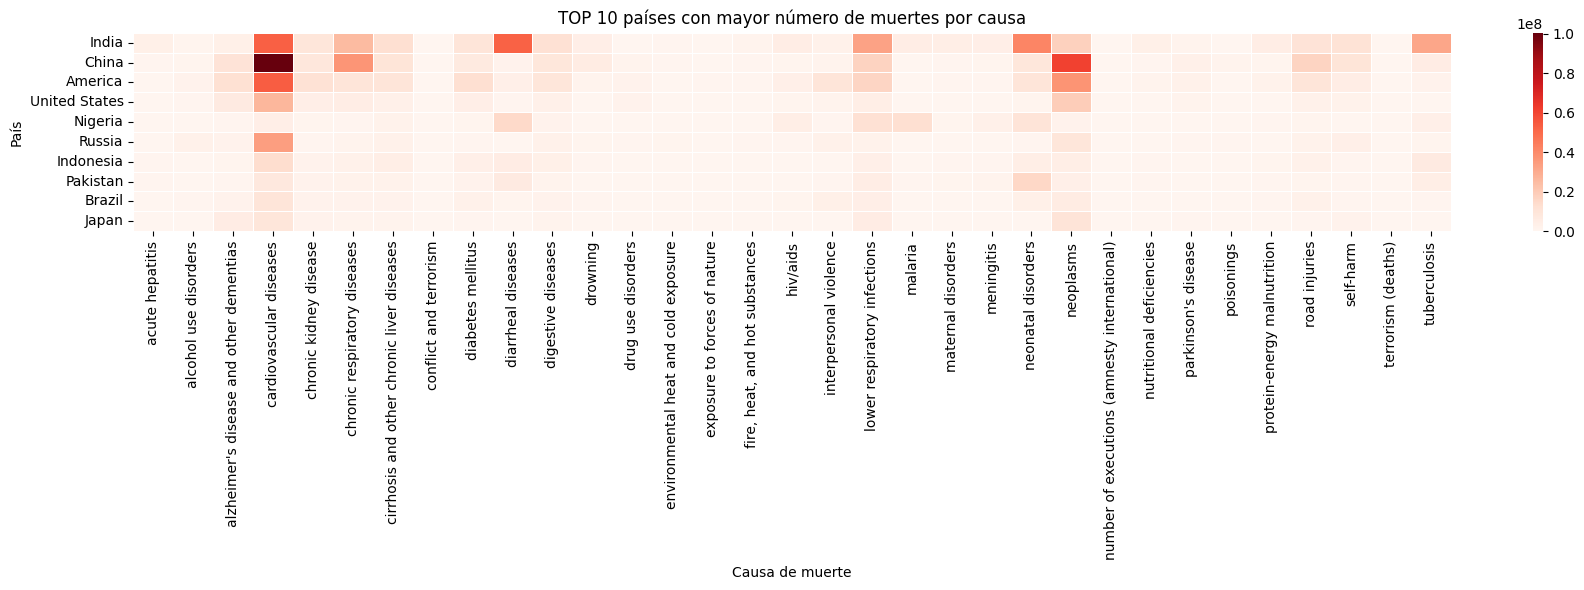

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear tabla dinámica
heatmap_data = merged_df.pivot_table(
    index='entity',
    columns='causes_name_df2',
    values='death_numbers',
    aggfunc='sum'
).fillna(0)

# Seleccionar los países con mayor número total de muertes
top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index

# Filtrar solo esos países
heatmap_top = heatmap_data.loc[top_countries]

# Gráfica
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_top, cmap="Reds", linewidths=0.5)
plt.title("TOP 10 países con mayor número de muertes por causa")
plt.xlabel("Causa de muerte")
plt.ylabel("País")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


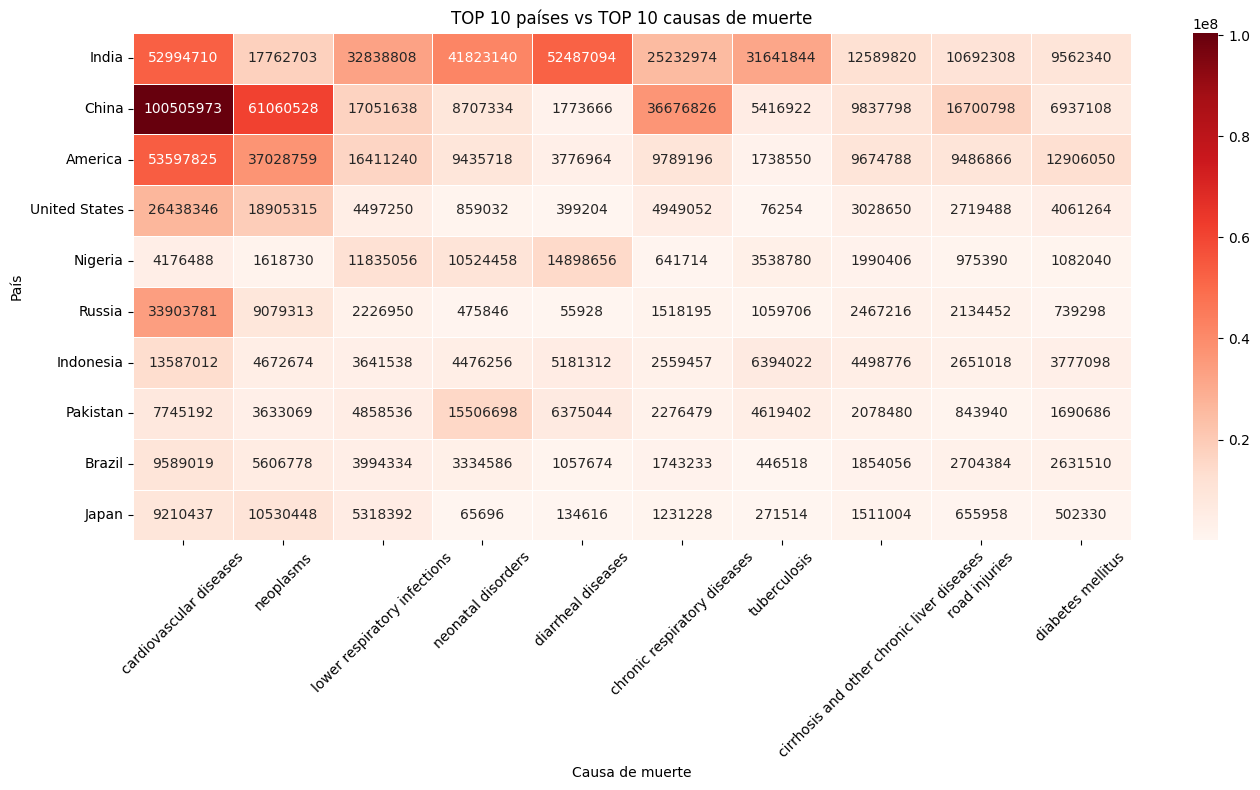

In [ ]:
#10 paises con mas muertes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tabla dinámica (país vs causa)
heatmap_data = merged_df.pivot_table(
    index='entity',
    columns='causes_name_df2',
    values='death_numbers',
    aggfunc='sum'
).fillna(0)

# TOP 10 países con más muertes
top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index

# TOP 10 causas con más muertes
top_causes = heatmap_data.sum(axis=0).sort_values(ascending=False).head(10).index

# Filtrar ambos
heatmap_combined = heatmap_data.loc[top_countries, top_causes]

# Gráfica
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_combined, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f")
plt.title("TOP 10 países vs TOP 10 causas de muerte")
plt.xlabel("Causa de muerte")
plt.ylabel("País")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/tmp/ipython-input-238-4129091271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causas.values, y=top_causas.index, palette='Reds_r')


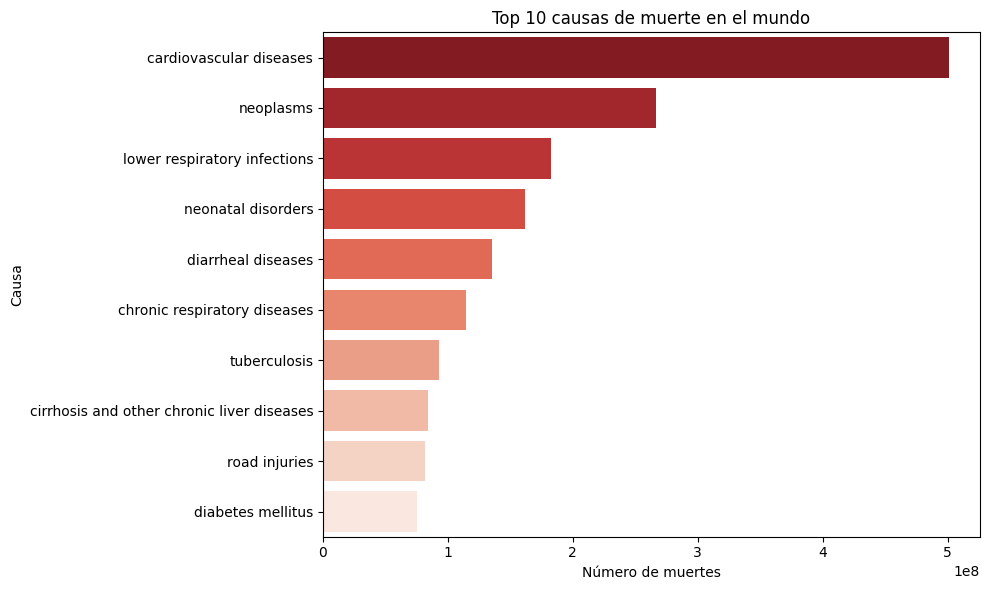

In [ ]:
top_causas = (
    merged_df.groupby('causes_name_df2')['death_numbers']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_causas.values, y=top_causas.index, palette='Reds_r')
plt.title("Top 10 causas de muerte en el mundo")
plt.xlabel("Número de muertes")
plt.ylabel("Causa")
plt.tight_layout()
plt.show()


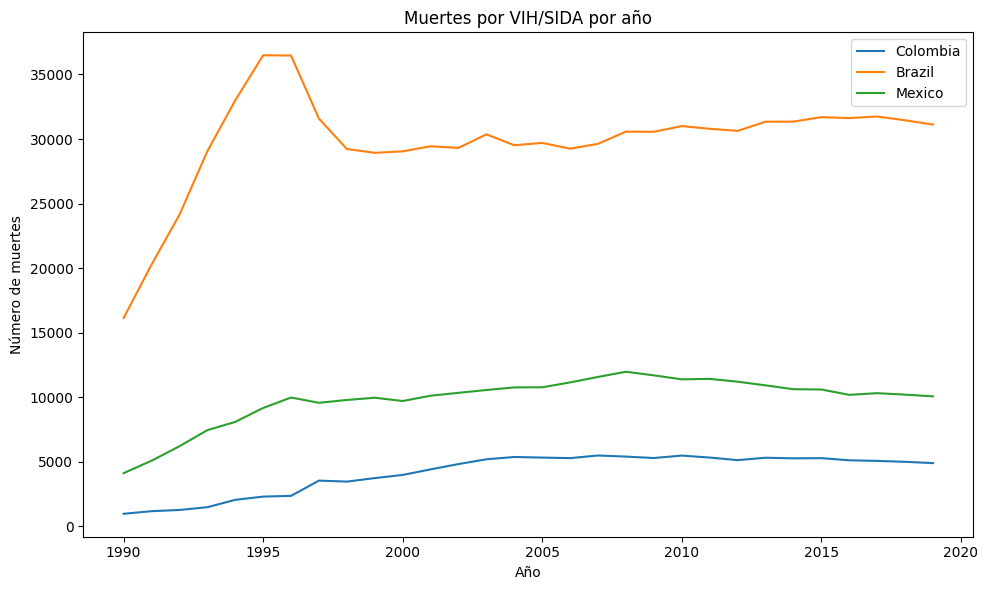

In [ ]:
# Filtrar por causa específica
causa_filtrada = merged_df[merged_df['causes_name_df2'].str.contains('hiv/aids', case=False)]

# Agrupar por país y año
evolucion = causa_filtrada.groupby(['entity', 'year'])['death_numbers'].sum().reset_index()

# Graficar para 3 países ejemplo
paises = ['Colombia', 'Brazil', 'Mexico']
plt.figure(figsize=(10, 6))

for pais in paises:
    df_pais = evolucion[evolucion['entity'] == pais]
    plt.plot(df_pais['year'], df_pais['death_numbers'], label=pais)

plt.title("Muertes por VIH/SIDA por año")
plt.xlabel("Año")
plt.ylabel("Número de muertes")
plt.legend()
plt.tight_layout()
plt.show()
